# Brainstation Project to Create a Model to Predict Review Ratings Using Text

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('data/Womens Clothing E-Commerce Reviews.csv',index_col=0)

## Understanding the Data

In [3]:
df1.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df1.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
df1.describe(include='all')

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
count,23486.000000,23486.000000,19676,22641,23486.000000,23486.000000,23486.000000,23472,23472,23472
unique,NaN,NaN,13993,22634,NaN,NaN,NaN,3,6,20
top,NaN,NaN,Love it!,Perfect fit and i've gotten so many compliment...,NaN,NaN,NaN,General,Tops,Dresses
freq,NaN,NaN,136,3,NaN,NaN,NaN,13850,10468,6319
mean,918.118709,43.198544,NaN,NaN,4.196032,0.822362,2.535936,NaN,NaN,NaN
std,203.298980,12.279544,NaN,NaN,1.110031,0.382216,5.702202,NaN,NaN,NaN
min,0.000000,18.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN
25%,861.000000,34.000000,NaN,NaN,4.000000,1.000000,0.000000,NaN,NaN,NaN
50%,936.000000,41.000000,NaN,NaN,5.000000,1.000000,1.000000,NaN,NaN,NaN
75%,1078.000000,52.000000,NaN,NaN,5.000000,1.000000,3.000000,NaN,NaN,NaN


In [6]:
# https://scikit-learn.org/stable/auto_examples/index.html#classification
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
#https://machinelearningmastery.com/clean-text-machine-learning-python/
#https://towardsdatascience.com/tf-idf-a-visual-explainer-and-python-implementation-on-presidential-inauguration-speeches-2a7671168550

In [7]:
counts = df1.groupby('Age').agg(len)
counts

,Clothing ID,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Age,,,,,,,,,
18,4,4,4,4,4,4,4,4,4
19,40,40,40,40,40,40,40,40,40
20,108,108,108,108,108,108,108,108,108
21,102,102,102,102,102,102,102,102,102
22,146,146,146,146,146,146,146,146,146
...,...,...,...,...,...,...,...,...,...
91,5,5,5,5,5,5,5,5,5
92,1,1,1,1,1,1,1,1,1
93,2,2,2,2,2,2,2,2,2


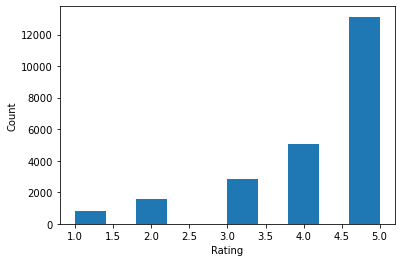

In [8]:
plt.figure()
plt.hist(df1['Rating'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

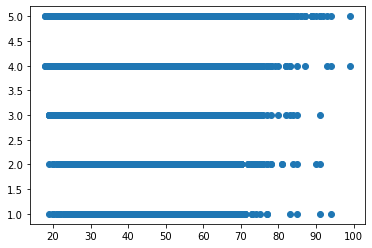

In [9]:
plt.figure()
plt.scatter(df1['Age'], df1['Rating']) #x-carat and y-diamond
plt.show()

In [10]:
df1.corr()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
Clothing ID,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended IND,-0.016206,0.030622,0.792336,1.000000,-0.069045
Positive Feedback Count,0.046356,0.043079,-0.064961,-0.069045,1.000000


In [11]:
import seaborn as sns

sns.set_style('whitegrid')

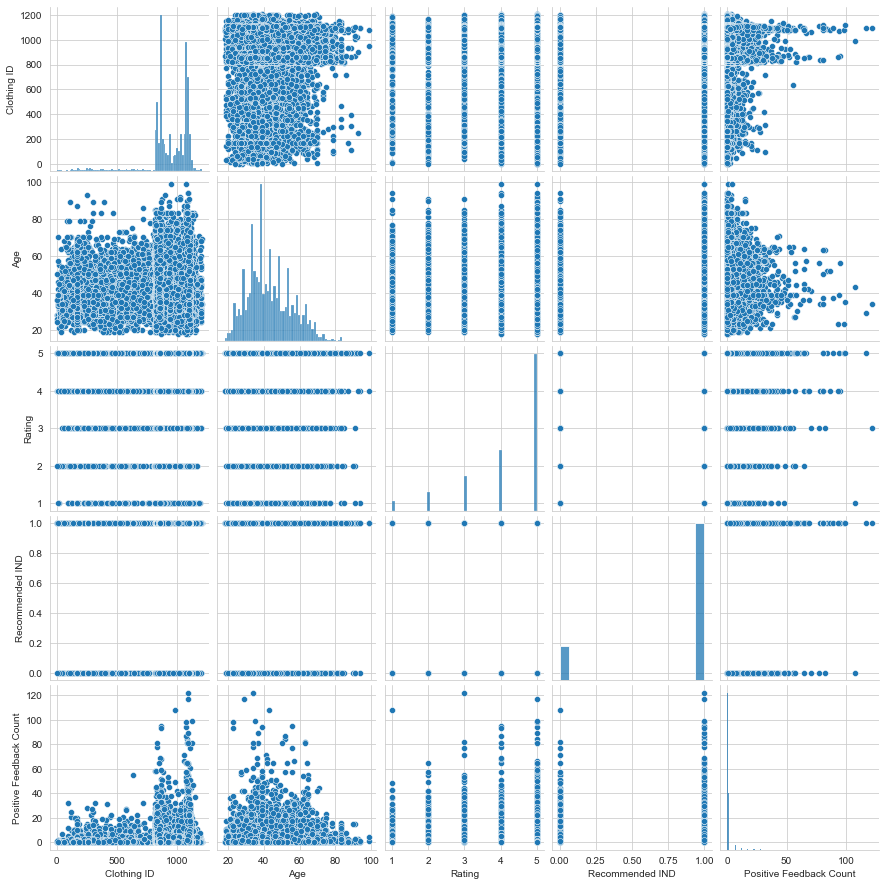

In [12]:
sns.pairplot(df1)
plt.show()

from sklearn.feature_extraction.text import TfidfVectorizer
corpus=df['Review Text']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)


## Prepping the Data

In [13]:
# df1['words'] = df['Review Text'].str.split(expand=True)
df1
# print(words[:100])

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [14]:
df1['Review Text'].str.rsplit(expand=True,) #split each word within the Review text into separate columns

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,Absolutely,wonderful,-,silky,and,sexy,and,comfortable,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Love,this,dress!,it's,sooo,pretty.,i,happened,to,find,...,None,None,None,None,None,None,None,None,None,None
2,I,had,such,high,hopes,for,this,dress,and,really,...,None,None,None,None,None,None,None,None,None,None
3,I,"love,","love,",love,this,jumpsuit.,it's,"fun,","flirty,",and,...,None,None,None,None,None,None,None,None,None,None
4,This,shirt,is,very,flattering,to,all,due,to,the,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,I,was,very,happy,to,snag,this,dress,at,such,...,None,None,None,None,None,None,None,None,None,None
23482,It,reminds,me,of,maternity,clothes.,"soft,","stretchy,",shiny,material.,...,None,None,None,None,None,None,None,None,None,None
23483,This,fit,"well,",but,the,top,was,very,see,through.,...,None,None,None,None,None,None,None,None,None,None
23484,I,bought,this,dress,for,a,wedding,i,have,this,...,None,None,None,None,None,None,None,None,None,None


In [15]:
df1

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [16]:
import nltk
nltk.download('stopwords')
#remove stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayotolaosibogun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')


In [18]:
#test

In [19]:
df1['words']=df1['Review Text'].str.rsplit()
df1['words'] = df1['words'].astype(str)
df1['words']=df1['words'].str.lower()
df1

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,words
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"['absolutely', 'wonderful', '-', 'silky', 'and..."
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"['love', 'this', 'dress!', ""it's"", 'sooo', 'pr..."
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"['i', 'had', 'such', 'high', 'hopes', 'for', '..."
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"['i', 'love,', 'love,', 'love', 'this', 'jumps..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"['this', 'shirt', 'is', 'very', 'flattering', ..."
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,"['i', 'was', 'very', 'happy', 'to', 'snag', 't..."
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,"['it', 'reminds', 'me', 'of', 'maternity', 'cl..."
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,"['this', 'fit', 'well,', 'but', 'the', 'top', ..."
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,"['i', 'bought', 'this', 'dress', 'for', 'a', '..."


In [20]:

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df1['words'] = df1['words'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df1

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,words
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"['absolutely', 'wonderful', '-', 'silky', 'and..."
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"['love', 'this', 'dress!', ""it's"", 'sooo', 'pr..."
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"['i', 'had', 'such', 'high', 'hopes', 'for', '..."
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"['i', 'love,', 'love,', 'love', 'this', 'jumps..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"['this', 'shirt', 'is', 'very', 'flattering', ..."
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,"['i', 'was', 'very', 'happy', 'to', 'snag', 't..."
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,"['it', 'reminds', 'me', 'of', 'maternity', 'cl..."
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,"['this', 'fit', 'well,', 'but', 'the', 'top', ..."
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,"['i', 'bought', 'this', 'dress', 'for', 'a', '..."


In [21]:
pat = r'\b(?:{})\b'.format('|'.join(stop))
df1['words'] = df1['words'].str.replace(pat, '')
df1['words'] = df1['words'].str.replace(r'\s+', ' ')
df1
# remove spaces

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,words
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"['absolutely', 'wonderful', '-', 'silky', '', ..."
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"['love', '', 'dress!', ""'"", 'sooo', 'pretty.',..."
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"['', '', '', 'high', 'hopes', '', '', 'dress',..."
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"['', 'love,', 'love,', 'love', '', 'jumpsuit.'..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"['', 'shirt', '', '', 'flattering', '', '', 'd..."
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,"['', '', '', 'happy', '', 'snag', '', 'dress',..."
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,"['', 'reminds', '', '', 'maternity', 'clothes...."
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,"['', 'fit', 'well,', '', '', 'top', '', '', 's..."
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,"['', 'bought', '', 'dress', '', '', 'wedding',..."


In [22]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [23]:
df1['words'] = df1['words'].apply(lambda x:''.join([stemmer.stem(y) for y in x])) # Stem every word.
# df = df.drop(columns=['unstemmed']) # Get rid of the unstemmed column.
df1 # Print dataframe.

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,words
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"['absolutely', 'wonderful', '-', 'silky', '', ..."
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"['love', '', 'dress!', ""'"", 'sooo', 'pretty.',..."
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"['', '', '', 'high', 'hopes', '', '', 'dress',..."
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"['', 'love,', 'love,', 'love', '', 'jumpsuit.'..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"['', 'shirt', '', '', 'flattering', '', '', 'd..."
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,"['', '', '', 'happy', '', 'snag', '', 'dress',..."
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,"['', 'reminds', '', '', 'maternity', 'clothes...."
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,"['', 'fit', 'well,', '', '', 'top', '', '', 's..."
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,"['', 'bought', '', 'dress', '', '', 'wedding',..."


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(encoding='utf-8',lowercase=True)
x = vectorizer.fit_transform(df1['words'])
vectorizer.get_feature_names()


['00',
 '000',
 '00p',
 '02',
 '03',
 '03dd',
 '04',
 '06',
 '0dd',
 '0in',
 '0p',
 '0petite',
 '0r',
 '0verall',
 '0xs',
 '10',
 '100',
 '1000',
 '100lb',
 '100lbs',
 '101',
 '102',
 '102lbs',
 '103',
 '103lb',
 '103lbs',
 '104',
 '104lbs',
 '105',
 '105lb',
 '105lbs',
 '106',
 '106lbs',
 '107',
 '107lb',
 '107lbs',
 '107pound',
 '108',
 '108lbs',
 '109',
 '109lbs',
 '10l',
 '10lbs',
 '10mths',
 '10p',
 '10s',
 '10th',
 '10x',
 '11',
 '110',
 '110lb',
 '110lbs',
 '111',
 '111lbs',
 '112',
 '112lb',
 '112lbs',
 '112llbs',
 '113',
 '113lbs',
 '114',
 '114lb',
 '114lbs',
 '115',
 '115ish',
 '115lb',
 '115lbs',
 '115llbs',
 '116',
 '116bs',
 '116ibs',
 '116lb',
 '116lbs',
 '117',
 '117bl',
 '117lbs',
 '118',
 '118lb',
 '118lbs',
 '119',
 '11and',
 '11in',
 '11inches',
 '12',
 '120',
 '120lb',
 '120lbs',
 '121',
 '122',
 '122lb',
 '122lbs',
 '123',
 '123lb',
 '123lbs',
 '123lbssize',
 '124',
 '124lb',
 '124lbs',
 '125',
 '125b',
 '125ibs',
 '125ish',
 '125lb',
 '125lbs',
 '126',
 '126lbs',

In [196]:
# df1['vector'] = []

# for x in 


In [27]:
df1['Review Text'].str.rsplit(expand=True,)

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,Absolutely,wonderful,-,silky,and,sexy,and,comfortable,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Love,this,dress!,it's,sooo,pretty.,i,happened,to,find,...,None,None,None,None,None,None,None,None,None,None
2,I,had,such,high,hopes,for,this,dress,and,really,...,None,None,None,None,None,None,None,None,None,None
3,I,"love,","love,",love,this,jumpsuit.,it's,"fun,","flirty,",and,...,None,None,None,None,None,None,None,None,None,None
4,This,shirt,is,very,flattering,to,all,due,to,the,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,I,was,very,happy,to,snag,this,dress,at,such,...,None,None,None,None,None,None,None,None,None,None
23482,It,reminds,me,of,maternity,clothes.,"soft,","stretchy,",shiny,material.,...,None,None,None,None,None,None,None,None,None,None
23483,This,fit,"well,",but,the,top,was,very,see,through.,...,None,None,None,None,None,None,None,None,None,None
23484,I,bought,this,dress,for,a,wedding,i,have,this,...,None,None,None,None,None,None,None,None,None,None


In [28]:
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
df3 = pd.DataFrame(x.toarray(),columns= vectorizer.get_feature_names())
df3

#vectorize each word found

,00,000,00p,02,03,03dd,04,06,0dd,0in,...,zippie,zipping,zips,zombie,zone,zoolander,zoom,zooming,zuma,ã¼ber
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Further reduce unwanted text/columns

In [30]:
import statistics 

In [31]:
for column in df3.columns:
    y= df3[df3.column > 0][column]
    x= statistics.stdev(y)
#     x= y.mean()
    if x> 0.0 and x<=0.05:
        
#         print(f"column name:{column}, X_mean:{x}, x>value:{x>0.05}")
          print(f"column name:{column}, X_stdev:{x}, x>value:{x<0.05}")
#used the standard deviation

column name:back, X_stdev:0.04121972513963101, x>value:True
column name:beautiful, X_stdev:0.04830673551566132, x>value:True
column name:color, X_stdev:0.035546923105557994, x>value:True
column name:column, X_stdev:0.012841139306722977, x>value:True
column name:fabric, X_stdev:0.037595352782593724, x>value:True
column name:fit, X_stdev:0.032080656213189555, x>value:True
column name:good, X_stdev:0.04731445580557728, x>value:True
column name:large, X_stdev:0.04491627153145961, x>value:True
column name:length, X_stdev:0.04507507714917952, x>value:True
column name:look, X_stdev:0.045951509734043, x>value:True
column name:material, X_stdev:0.04435820218896604, x>value:True
column name:much, X_stdev:0.04706034822615515, x>value:True
column name:ordered, X_stdev:0.04217490510904135, x>value:True
column name:petite, X_stdev:0.045486764098820485, x>value:True
column name:pretty, X_stdev:0.04737309242342875, x>value:True
column name:quality, X_stdev:0.04876627022539517, x>value:True
column name

In [32]:
df_columns = []

for column in df3.columns:
    y= df3[df3.column > 0][column]
    x= statistics.stdev(y)
#     x= y.mean()
    if x> 0.0 and x<=0.05:
          
            df_columns.append(column)

df_columns

# filter out columns that are not needed or reduce the columns

['back',
 'beautiful',
 'color',
 'column',
 'fabric',
 'fit',
 'good',
 'large',
 'length',
 'look',
 'material',
 'much',
 'ordered',
 'petite',
 'pretty',
 'quality',
 'really',
 'size',
 'top',
 'well']

In [33]:
df4 = df3[df_columns]
df4

,back,beautiful,color,column,fabric,fit,good,large,length,look,material,much,ordered,petite,pretty,quality,really,size,top,well
0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.117644,0.0,0.000000,0.000000,0.104614,0.379835,0.123642,0.0,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.000000,0.055858,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.069792,0.168933,0.000000,0.0,0.070372,0.054383,0.059515,0.000000
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.178400,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.165530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,0.0,0.0,0.191235,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
23482,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.136706,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
23483,0.0,0.0,0.000000,0.0,0.169343,0.144503,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.153964,0.188388
23484,0.0,0.0,0.000000,0.0,0.000000,0.079903,0.0,0.0,0.000000,0.0,0.000000,0.111399,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [34]:
df4 = df3[['back','beautiful','color','column','fabric','fit','good','large','length','look','material','much','ordered'
          ,'petite','pretty','quality','really','size','top','well']]
df4

,back,beautiful,color,column,fabric,fit,good,large,length,look,material,much,ordered,petite,pretty,quality,really,size,top,well
0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.117644,0.0,0.000000,0.000000,0.104614,0.379835,0.123642,0.0,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.000000,0.055858,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.069792,0.168933,0.000000,0.0,0.070372,0.054383,0.059515,0.000000
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.178400,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.165530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,0.0,0.0,0.191235,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
23482,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.136706,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
23483,0.0,0.0,0.000000,0.0,0.169343,0.144503,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.153964,0.188388
23484,0.0,0.0,0.000000,0.0,0.000000,0.079903,0.0,0.0,0.000000,0.0,0.000000,0.111399,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [35]:
res = pd.concat([df1, df4], axis=1)
# res.describe()
res.head(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,...,material,much,ordered,petite,pretty,quality,really,size,top,well
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,...,0.0,0.0,0.104614,0.379835,0.123642,0.0,0.000000,0.000000,0.000000,0.00000
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,...,0.0,0.0,0.069792,0.168933,0.000000,0.0,0.070372,0.054383,0.059515,0.00000
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.16553


In [36]:
len(res)

23486

In [37]:
res['beautiful']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23481    0.0
23482    0.0
23483    0.0
23484    0.0
23485    0.0
Name: beautiful, Length: 23486, dtype: float64

In [38]:
res['pretty']

0        0.000000
1        0.123642
2        0.000000
3        0.000000
4        0.000000
           ...   
23481    0.000000
23482    0.000000
23483    0.000000
23484    0.000000
23485    0.000000
Name: pretty, Length: 23486, dtype: float64

In [39]:
res.loc[:1,]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,...,material,much,ordered,petite,pretty,quality,really,size,top,well
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,...,0.0,0.0,0.104614,0.379835,0.123642,0.0,0.0,0.0,0.0,0.0


In [40]:
res_df = res[['Clothing ID', 'Age','Title', 'Review Text', 'Rating', 'beautiful']]
res_df[res_df['beautiful']>0]

,Clothing ID,Age,Title,Review Text,Rating,beautiful
29,4,28,Great layering piece,This sweater is so comfy and classic - it bala...,5,0.097821
41,862,40,NaN,This is a beautiful top. it's unique and not s...,5,0.150201
49,862,33,Love the embroidery!,Really cute top! the embroidery on the collar ...,5,0.128920
60,1095,41,Gorgeous dress!,This dress is simply beautiful and stunning. i...,5,0.277233
65,862,58,NaN,"Beautiful top, but delicate! i wore it to scho...",4,0.226032
...,...,...,...,...,...,...
23425,430,23,NaN,A great long line bra! beautiful and well made...,4,0.091330
23426,854,27,Love love love...just really sheer,Absolutely love this shirt - the embroidery on...,4,0.133523
23427,854,42,Sheer shirt,What drew me to this shirt was the beautiful s...,2,0.077453
23464,1104,42,Compliments,I wore this dress to work the other day and go...,5,0.180894


#test

#looking into correlation of selected columns

In [43]:
res.corr()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,back,beautiful,color,column,fabric,...,material,much,ordered,petite,pretty,quality,really,size,top,well
Clothing ID,1.000000,0.017972,-0.018879,-0.016206,0.046356,-0.006116,0.039291,0.013018,-0.004999,0.034819,...,0.006181,0.017521,0.006255,0.078860,-0.017218,-0.012073,-0.001844,0.026651,-0.126152,-0.000740
Age,0.017972,1.000000,0.026831,0.030622,0.043079,0.022332,0.010052,0.030644,0.008546,0.043192,...,-0.028959,-0.004398,0.026517,-0.005691,0.006219,-0.008513,-0.027651,0.016699,0.011358,-0.003819
Rating,-0.018879,0.026831,1.000000,0.792336,-0.064961,-0.134235,0.038149,0.033177,0.000224,-0.093970,...,-0.073019,-0.068934,-0.052927,0.008620,-0.030420,-0.034199,-0.055560,0.044177,-0.027247,0.052568
Recommended IND,-0.016206,0.030622,0.792336,1.000000,-0.069045,-0.134516,0.025703,0.030765,0.006060,-0.087627,...,-0.071574,-0.077510,-0.030982,0.020744,-0.008517,-0.039327,-0.039016,0.065687,-0.028213,0.046119
Positive Feedback Count,0.046356,0.043079,-0.064961,-0.069045,1.000000,0.032026,0.003146,-0.007975,-0.000192,0.026963,...,0.002563,0.017509,0.000143,0.027374,-0.000441,-0.003199,0.014537,0.032089,0.014625,-0.015191
back,-0.006116,0.022332,-0.134235,-0.134516,0.032026,1.000000,-0.001686,-0.009096,0.001475,0.021442,...,0.012829,0.025912,0.019359,-0.012585,0.010168,-0.008741,0.024951,-0.017941,0.032910,-0.011223
beautiful,0.039291,0.010052,0.038149,0.025703,0.003146,-0.001686,1.000000,0.071859,0.006454,0.036742,...,0.007249,-0.000582,0.007847,-0.008790,-0.018955,0.019761,-0.003236,0.014118,0.021559,0.032450
color,0.013018,0.030644,0.033177,0.030765,-0.007975,-0.009096,0.071859,1.000000,-0.000961,0.018308,...,-0.004532,0.021316,0.036735,-0.001565,0.025888,0.009578,0.014972,-0.006111,-0.006809,0.006747
column,-0.004999,0.008546,0.000224,0.006060,-0.000192,0.001475,0.006454,-0.000961,1.000000,-0.000348,...,0.002159,0.003562,0.001457,0.002781,0.003326,0.003780,0.001218,-0.003018,0.004285,0.001237
fabric,0.034819,0.043192,-0.093970,-0.087627,0.026963,0.021442,0.036742,0.018308,-0.000348,1.000000,...,-0.089117,0.071078,-0.009930,-0.006695,0.010273,0.056638,0.022521,-0.011272,0.027601,0.005680


In [44]:
# # sns.pairplot(res)
# plt.show()

In [45]:
len(res.columns)

31

In [46]:
res['text ln']= res['Review Text'].str.split().str.len()
res #to add the length of words in review

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,...,much,ordered,petite,pretty,quality,really,size,top,well,text ln
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.0
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,...,0.000000,0.104614,0.379835,0.123642,0.0,0.000000,0.000000,0.000000,0.000000,62.0
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,...,0.000000,0.069792,0.168933,0.000000,0.0,0.070372,0.054383,0.059515,0.000000,98.0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,22.0
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.165530,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,28.0
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,38.0
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.153964,0.188388,42.0
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,...,0.111399,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,86.0


## 1st Attempt on Regression Analysis

In [47]:
# Import the formula tools
import statsmodels.formula.api as smf

#Create a model that could help predict Rating (y value)


In [48]:
res.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'words', 'back', 'beautiful', 'color',
       'column', 'fabric', 'fit', 'good', 'large', 'length', 'look',
       'material', 'much', 'ordered', 'petite', 'pretty', 'quality', 'really',
       'size', 'top', 'well', 'text ln'],
      dtype='object')

In [49]:
res.rename(columns={'Clothing ID':'Clothing_ID','Review Text':'Review_Text', 'Recommended IND': 'Recommended_IND', 'Positive Feedback Count': 'Positive_Feedback_Count',
                   'Division Name': 'Division_Name', 'Department Name': 'Department_Name', 'Class Name': 'Class_Name','text ln':'text_ln'}, inplace=True)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
x = res[['Age', 'Title', 'Review_Text',
       'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name', 'words', 'back', 'beautiful', 'color',
       'column', 'fabric', 'fit', 'good', 'large', 'length', 'look',
       'material', 'much', 'ordered', 'petite', 'pretty', 'quality', 'really',
       'size', 'top', 'well', 'text_ln']]
y=res['Rating']

In [52]:
# res_2 = smf.ols("Rating ~ Age + Title + Positive_Feedback_Count + Division_Name + Department_Name + Class_Name + words + back + beautiful + color + column + fabric + fit + good + large + length + look + material + much + ordered + petite + pretty + quality + really + size + top + well + text_ln", data=res).fit() 
# res_2.summary() 
# too long to run

In [53]:
import statsmodels.formula.api as smf

In [ ]:
#received a bad Rsquared value

In [54]:
res_2 = smf.ols("Rating ~ Age + Positive_Feedback_Count + back + beautiful + color + column + fabric + fit + good + large + length + look + material + much + ordered + petite + pretty + quality + really + size + top + well + text_ln", data=res).fit()
res_2.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     63.72
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          2.32e-286
Time:                        15:20:27   Log-Likelihood:                -33895.
No. Observations:               22641   AIC:                         6.784e+04
Df Residuals:                   22617   BIC:                         6.803e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.2600      0.032    135.184      0.000       4.198       4.322
Age                         0.0032      0.001      5.422      0.000       0.002       0.004
Positive_Feedback_Count    -0.0100      0.001     -7.863      0.000      -0.012      -0.007
back                       -2.9889      0.161    -18.545      0.000      -3.305      -2.673
beautiful                   0.8213      0.143      5.758      0.000       0.542       1.101
color                       0.7647      0.141      5.410      0.000       0.488       1.042
column                      0.4715      2.101      0.224      0.822      -3.647       4.590
fabric                     -2.0645      0.148    -13.911      0.000      -2.355      -1.774
fit                         0.3520      0.138      2.543      0.011       0.081       0.623
good                       -0.2316      0.170     -1.365      0.172      -0.564       0.101
large                      -0.8725      0.147     -5.939      0.000      -1.160      -0.585
length                      1.2394      0.163      7.583      0.000       0.919       1.560
look                       -0.9956      0.154     -6.455      0.000      -1.298      -0.693
material                   -1.7029      0.154    -11.047      0.000      -2.005      -1.401
much                       -1.2691      0.167     -7.586      0.000      -1.597      -0.941
ordered                    -1.3686      0.158     -8.638      0.000      -1.679      -1.058
petite                      0.2202      0.161      1.368      0.171      -0.095       0.536
pretty                     -0.5734      0.158     -3.623      0.000      -0.884      -0.263
quality                    -0.6637      0.163     -4.075      0.000      -0.983      -0.344
really                     -0.9223      0.145     -6.345      0.000      -1.207      -0.637
size                        1.0651      0.125      8.490      0.000       0.819       1.311
top                        -0.1780      0.110     -1.620      0.105      -0.393       0.037
well                        1.2309      0.149      8.266      0.000       0.939       1.523
text_ln                    -0.0012      0.000     -4.453      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     3970.843   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6408.372
Skew:                          -1.230   Prob(JB):                         0.00
Kurtosis:                       3.861   Cond. No.                     2.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number 

In [55]:
res['words'].head()

0    ['absolutely', 'wonderful', '-', 'silky', '', ...
1    ['love', '', 'dress!', "'", 'sooo', 'pretty.',...
2    ['', '', '', 'high', 'hopes', '', '', 'dress',...
3    ['', 'love,', 'love,', 'love', '', 'jumpsuit.'...
4    ['', 'shirt', '', '', 'flattering', '', '', 'd...
Name: words, dtype: object

In [56]:
res['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [57]:
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from seaborn import pairplot, heatmap

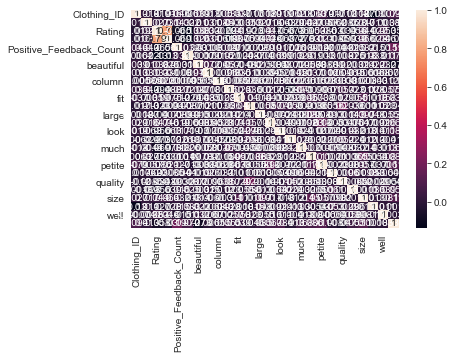

In [58]:
heatmap(res.corr(), annot=True);

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [62]:

x=res['Rating'].values.reshape(-1, 1)

y= res['Age']

# # y = res[['Age', 'Title', 'Review_Text',
#        'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name',
#        'Department_Name', 'Class_Name', 'words', 'back', 'beautiful', 'color',
#        'column', 'fabric', 'fit', 'good', 'large', 'length', 'look',
#        'material', 'much', 'ordered', 'petite', 'pretty', 'quality', 'really',
#        'size', 'top', 'well', 'text_ln']]


In [63]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [64]:
model.predict_proba(x)

array([[1.66122351e-04, 1.88283778e-03, 4.78376787e-03, ...,
        5.43082007e-05, 5.51152277e-05, 5.43082007e-05],
       [5.98602232e-05, 1.43370975e-03, 4.79915173e-03, ...,
        1.33292679e-05, 1.29017375e-05, 1.33292679e-05],
       [4.57250308e-04, 2.45251801e-03, 4.73041078e-03, ...,
        2.19478013e-04, 2.33537140e-04, 2.19478013e-04],
       ...,
       [4.57250308e-04, 2.45251801e-03, 4.73041078e-03, ...,
        2.19478013e-04, 2.33537140e-04, 2.19478013e-04],
       [4.57250308e-04, 2.45251801e-03, 4.73041078e-03, ...,
        2.19478013e-04, 2.33537140e-04, 2.19478013e-04],
       [5.98602232e-05, 1.43370975e-03, 4.79915173e-03, ...,
        1.33292679e-05, 1.29017375e-05, 1.33292679e-05]])

In [ ]:
model.intercept_
model.coef_

In [ ]:
model.intercept_

In [65]:
 model.score(x, y)

0.05428766073405433

In [71]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split

In [180]:
res_3= res[['Clothing_ID', 'Age', 'Rating',
       'Recommended_IND', 'Positive_Feedback_Count', 'back', 'beautiful', 'color',
       'column', 'fabric', 'fit', 'good', 'large', 'length', 'look',
       'material', 'much', 'ordered', 'petite', 'pretty', 'quality', 'really',
       'size', 'top', 'well']]

In [ ]:
# separating to testing

### Separate the dataset into Test and Train

In [107]:
X = res_3.loc[:, res_3.columns != 'Rating']
y = res_3.loc[:, res_3.columns == 'Rating']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Rating'])

### Feature selection to further reduce the noise

In [109]:
data_final_vars=res_3.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/Users/ayotolaosibogun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/ayotolaosibogun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ayotolaosibogun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

[False False  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
[4 2 1 3 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/Users/ayotolaosibogun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [136]:
os_data_X.columns

Index(['Clothing_ID', 'Age', 'Recommended_IND', 'Positive_Feedback_Count',
       'back', 'beautiful', 'color', 'column', 'fabric', 'fit', 'good',
       'large', 'length', 'look', 'material', 'much', 'ordered', 'petite',
       'pretty', 'quality', 'really', 'size', 'top', 'well'],
      dtype='object')

In [147]:
os_data_y

,Rating
0,5
1,4
2,5
3,2
4,3
...,...
45685,4
45686,4
45687,4
45688,4


In [146]:
os_data_X

,Clothing_ID,Age,Recommended_IND,Positive_Feedback_Count,back,beautiful,color,column,fabric,fit,...,material,much,ordered,petite,pretty,quality,really,size,top,well
0,843,52,1,0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.153252,0.0,0.000000,0.000000,0.000000,0.000000,0.130687,0.000000
1,1083,38,1,4,0.000000,0.076128,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.073812
2,850,38,1,0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.171633,0.000000
3,1056,43,0,0,0.000000,0.000000,0.191152,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.119433,0.000000,0.000000,0.000000,0.000000,0.000000
4,884,29,1,0,0.000000,0.149580,0.000000,0.0,0.000000,0.111244,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.108305,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45685,875,42,1,2,0.065737,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.020277,0.000000,0.000000,0.000000,0.000000,0.000000
45686,908,57,1,0,0.000000,0.000000,0.056711,0.0,0.000000,0.095980,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.060459,0.000000,0.060121,0.000000
45687,974,63,1,2,0.079086,0.100565,0.018162,0.0,0.018011,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.019362,0.072815,0.000000,0.000000
45688,1020,52,1,0,0.000000,0.000000,0.090388,0.0,0.000000,0.000000,...,0.073795,0.0,0.000000,0.0,0.000000,0.077103,0.009709,0.000000,0.000000,0.000000


In [158]:
 res_4=pd.concat([os_data_y, os_data_X], axis=1)

In [149]:
# res_4=res_test[['Clothing_ID', 'Age', 'Recommended_IND', 'Positive_Feedback_Count',
#        'back', 'beautiful', 'color', 'column', 'fabric', 'fit', 'good',
#        'large', 'length', 'look', 'material', 'much', 'ordered', 'petite',
#        'pretty', 'quality', 'really', 'size', 'top', 'well']]

In [159]:
data1 = res_4[pd.notnull(res_4['Recommended_IND'])]
data

,Rating,Recommended_IND,back,beautiful,color,fabric,fit,good,large,length,...,material,much,ordered,petite,pretty,quality,really,size,top,well
0,4,1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,5,1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.117644,...,0.000000,0.000000,0.104614,0.379835,0.123642,0.0,0.000000,0.000000,0.000000,0.000000
2,3,0,0.0,0.0,0.000000,0.000000,0.055858,0.0,0.0,0.000000,...,0.000000,0.000000,0.069792,0.168933,0.000000,0.0,0.070372,0.054383,0.059515,0.000000
3,5,1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,5,1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.178400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.165530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,5,1,0.0,0.0,0.191235,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
23482,3,1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.136706,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
23483,3,0,0.0,0.0,0.000000,0.169343,0.144503,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.153964,0.188388
23484,3,1,0.0,0.0,0.000000,0.000000,0.079903,0.0,0.0,0.000000,...,0.000000,0.111399,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [122]:

y=res_4['Rating']

X= res_4[['Recommended_IND','back','beautiful','color', 'fabric', 'fit', 'good',
       'large','length', 'look', 'material', 'much', 'ordered', 'petite',
       'pretty', 'quality', 'really', 'size', 'top', 'well']]

## Second Attempt on Regression Analysis; Linear

In [160]:
res_l = smf.ols("Rating ~ Recommended_IND + back + beautiful + color + fabric + fit + good + large + length + look + material + much + ordered + petite + pretty + quality + really + size + top + well", data=res_4).fit()
res_l.summary() 
print(res_l.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     5418.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:33:36   Log-Likelihood:                -52894.
No. Observations:               45690   AIC:                         1.058e+05
Df Residuals:                   45669   BIC:                         1.060e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.9199      0.008    2

### p-value for good, petite,pretty and quality are >0.05 so will remove

In [152]:
# res_5=res_4[['Recommended_IND','back','beautiful','color', 'fabric', 'fit',
#        'large','length', 'look', 'material', 'much', 'ordered',
#          'really', 'size', 'top', 'well']]

In [161]:
res_l2 = smf.ols("Rating ~ Recommended_IND + back + beautiful + color + fabric + fit + large + length + look + material + much + ordered + really + size + top + well", data=res_4).fit()
res_l2.summary() 
print(res_l2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     6771.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:34:00   Log-Likelihood:                -52898.
No. Observations:               45690   AIC:                         1.058e+05
Df Residuals:                   45673   BIC:                         1.060e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.9194      0.008    2

### r-square is 0.7 which is not too bad, will look to see how to better test or get more variables, in addition the predictions are in decimals so will be best to do logistic/classification

In [179]:
predic_res= res_l2.predict(X_test)
predic_res


12906    4.275354
22440    4.333108
13965    4.487702
14369    4.341672
505      4.309561
           ...   
6203     4.329696
6589     4.309948
14362    4.434701
2952     4.340774
823      4.376545
Length: 7046, dtype: float64

In [163]:
y_test


,Rating
12906,4
22440,5
13965,5
14369,5
505,4
...,...
6203,5
6589,4
14362,5
2952,5


In [164]:
res_4.index

RangeIndex(start=0, stop=45690, step=1)

In [168]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(os_data_y.index,os_data_y['Rating'])


In [181]:
res_7= res_3[['Clothing_ID', 'Age', 'Rating',
       'Recommended_IND', 'Positive_Feedback_Count', 'back', 'beautiful', 'color',
       'column', 'fabric', 'fit', 'good', 'large', 'length', 'look',
       'material', 'much', 'ordered', 'petite', 'pretty', 'quality', 'really',
       'size', 'top', 'well']]

In [170]:
# dt['target'] = dt['target'].astype(str)


## Attempt at logistic regression/classification analysis

In [182]:
res_7['Rating']=res_7['Rating'].astype(str)

In [183]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
LR.predict(X_test)
round(LR.score(X_test,y_test), 4)

SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)
SVM.predict(X_test)
round(SVM.score(X_test, y_test), 4)

RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_train, y_train)
RF.predict(X_test)
round(RF.score(X_test, y_test), 4)

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(X_train, y_train)
NN.predict(X_test)
round(NN.score(X_test, y_test), 4)

/Users/ayotolaosibogun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ayotolaosibogun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ayotolaosibogun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

0.5667

In [189]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
LR.predict(X_test)

print('accuracy of training set: {:.2f}'.format(LR.score(X_train,y_train)))
print('accuracy of test set: {:.2f}'.format(LR.score(X_test,y_test)))
# round(LR.score(X_test,y_test), 4)

/Users/ayotolaosibogun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy of training set: 0.55
accuracy of test set: 0.56


/Users/ayotolaosibogun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [190]:
SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)
SVM.predict(X_test)
print('accuracy of training set: {:.2f}'.format(SVM.score(X_train,y_train)))
print('accuracy of test set: {:.2f}'.format(SVM.score(X_test,y_test)))

/Users/ayotolaosibogun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy of training set: 0.56
accuracy of test set: 0.57


In [191]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_train, y_train)
RF.predict(X_test)
print('accuracy of training set: {:.2f}'.format(RF.score(X_train,y_train)))
print('accuracy of test set: {:.2f}'.format(RF.score(X_test,y_test)))

<ipython-input-191-07f510d5c992>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_train, y_train)


accuracy of training set: 0.68
accuracy of test set: 0.64


In [192]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(X_train, y_train)
NN.predict(X_test)
print('accuracy of training set: {:.2f}'.format(NN.score(X_train,y_train)))
print('accuracy of test set: {:.2f}'.format(NN.score(X_test,y_test)))

/Users/ayotolaosibogun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy of training set: 0.56
accuracy of test set: 0.57


/Users/ayotolaosibogun/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [194]:
from sklearn.naive_bayes import GaussianNB

gnb= GaussianNB().fit(X_train, y_train)
gnb.predict(X_test)
print('accuracy of training set: {:.2f}'.format(gnb.score(X_train,y_train)))
print('accuracy of test set: {:.2f}'.format(gnb.score(X_test,y_test)))

accuracy of training set: 0.58
accuracy of test set: 0.58


/Users/ayotolaosibogun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### the random forest had the highest accuracy of 0.64 and not much of a gap.

In [195]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred= RF.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[   0   32  212    0    2]
 [   0   70  379    0   33]
 [   0   64  431    4  354]
 [   0    6   39    4 1423]
 [   0    0    7    3 3983]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       246
           2       0.41      0.15      0.21       482
           3       0.40      0.51      0.45       853
           4       0.36      0.00      0.01      1472
           5       0.69      1.00      0.81      3993

    accuracy                           0.64      7046
   macro avg       0.37      0.33      0.30      7046
weighted avg       0.54      0.64      0.53      7046



/Users/ayotolaosibogun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
